       Class                                               Text
0  Household  Paper Plane Design Framed Wall Hanging Motivat...
1  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2  Household  SAF 'UV Textured Modern Art Print Framed' Pain...
3  Household  SAF Flower Print Framed Painting (Synthetic, 1...
4  Household  Incredible Gifts India Wooden Happy Birthday U...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   50425 non-null  object
 1   Text    50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB
None
            Class                                               Text
count       50425                                              50424
unique          4                                              27802
top     Household  Think & Grow Rich About the Author NAPOLEON HI...
freq        19313                        

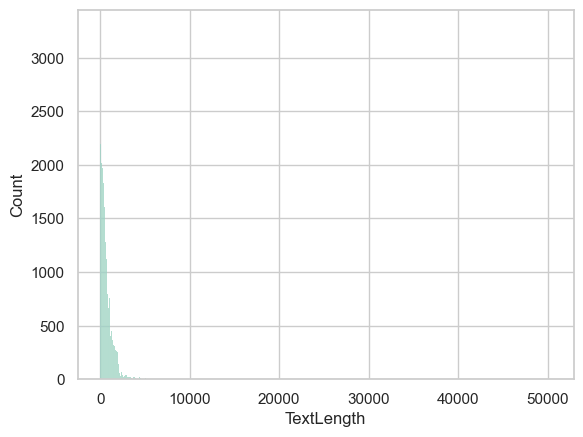

In [34]:
# ecommerce is sequence of data with label, whow the data shape and distribution of length

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ecommerceDataset.csv')
print(df.head())
print(df.info())
print(df.describe())

# check each row of df['Text'] check the type of data whether it is string or not
print(df['Text'].apply(type).value_counts())

# find one row of df['Text'] that is not string, convert each row df['Text'] to string
df['Text'] = df['Text'].apply(lambda x: str(x))
print(df['Text'].apply(type).value_counts())

# show the distribution of length of each row of df['Text']
df['TextLength'] = df['Text'].apply(len)
print(df['TextLength'].describe())
sns.histplot(df['TextLength'])
plt.show()







Class
Books                     495.0
Clothing & Accessories    342.0
Electronics               630.0
Household                 515.0
Name: TextLength, dtype: float64
0.25    456.75
0.75    543.75
Name: TextLength, dtype: float64


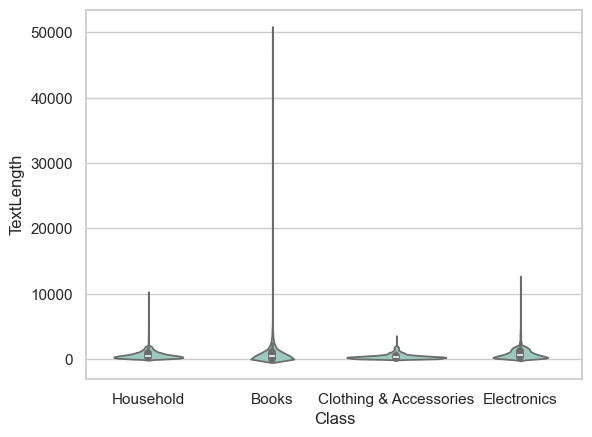

In [67]:
# add a normal distribution of length of each row of df['Text'] to df
# show the violin plot of the length of each row of df['Text'] with the label of df['Class']
# for 4 classes in one plot with different violin plot with the median of length of each class in the plot
# show the number of the median of length of each class in the plot 

df['NormalLength'] = np.random.normal(df['TextLength'].mean(), df['TextLength'].std(), df['TextLength'].shape)
sns.violinplot(x='Class', y='TextLength', data=df)

# print the median of length of each class with the label of df['Class']
print(df.groupby('Class')['TextLength'].median())

# print the uper and lower bound of the median of length of each class
print(df.groupby('Class')['TextLength'].median().quantile([0.25, 0.75]))




Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: Class, dtype: int64


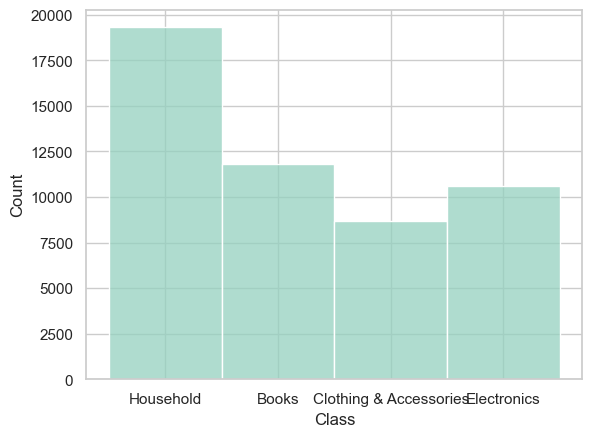

In [36]:
# show the length distribution of each label 
print(df['Class'].value_counts())
sns.histplot(df['Class'])
plt.show()


In [69]:
# using from tensorflow.keras.layers import Embedding  for the embedding layer of the model.
# using word embedding for the proper variable representations of the text data.
# mapping the words to the vectors of real numbers.

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# for better performance of model , we can define the specifi sequence length of the text data
# based on the distribution of the length of the text data, we decide the sequence length of the text data is 500
# we can use the padding to make the length of the text data to the same length
max_sequence_length = 500

# using the tokenizer to convert the text data to the sequence of the integer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Text'])
sequence = tokenizer.texts_to_sequences(df['Text'])
padded = pad_sequences(sequence, padding='post', maxlen=max_sequence_length)


# show the final shape of data which would using for the model
print(padded.shape)
# describe the final shape of data
print(pd.DataFrame(padded).describe())







# using the embedding layer to convert the sequence of the integer to the sequence of the vector
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, 32, input_length=padded.shape[1]))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(4, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()







(50425, 500)
                0             1             2             3             4    \
count  50425.000000  50425.000000  50425.000000  50425.000000  50425.000000   
mean   12559.086525   7028.067764   5162.792286   4154.280773   3517.385206   
std    16781.023223  13947.124684  12303.269395  10401.516520   9160.904595   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%     1527.000000    256.000000    168.000000    159.000000    135.000000   
50%     5988.000000   1396.000000    776.000000    772.000000    709.000000   
75%    16571.000000   6378.000000   3589.000000   3093.000000   2558.000000   
max    92231.000000  92259.000000  92260.000000  92266.000000  92205.000000   

                5             6             7             8             9    \
count  50425.000000  50425.000000  50425.000000  50425.000000  50425.000000   
mean    3257.321884   3218.849400   3140.680615   3103.512682   3092.863718   
std     9016.866514   9138.823248   90

C:\Users\lycaz\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [70]:
# show a example of the original dataset 
print(df['Text'][0])
# show the sequence of the integer of the example
print(sequence[0])
# show the padded sequence of the integer of the example
print(padded[0])


Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss